<center> <h1 style="background-color:orange; color:white"><br>Movies IMBD Rating Analysis<br></h1></center>

## `Objective of the Project :`

To create a informative report to track and analyse Revenue and Performance of the Movies among the audience so that the Director's can understand the taste of the audience and direct movies revelant to the taste of the audience so as to increase revenue in the upcoming years.

## `Importing the necessary libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `Load the dataset into dataframe`

In [2]:
Movies=pd.read_csv(r"C:\Users\Admin\Downloads\Python\Data Sets\IMDB.csv")
Movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
Movies.shape

(1000, 12)

In [4]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
Movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## `Data Cleaning :`

## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.<br>
Finding whether we have null values in the data is by using the isnull() function.<br>
There are many values which are missing, in pandas dataframe these values are reffered to as np.nan.<br> 
We want to deal with these values beause we can't use nan values to train models.<br> 
Either we can remove them to apply some strategy to replace them with other values.<br>

In this Case we are just replacing the Null Values with other Values using fillna() function.

In [6]:
Movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

We can see that there are 128 Null Values in Revenue Column and 64 Null Values in Metascore.

We are replacing the Null Values of Revenue Column with the Mean Value of Revenue.

In [7]:
Mean=Movies['Revenue (Millions)'].mean()
Mean

82.95637614678898

In [8]:
Movies['Revenue (Millions)']=Movies['Revenue (Millions)'].fillna(Mean)

In [9]:
Movies.isnull().sum()

Rank                   0
Title                  0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             64
dtype: int64

Now we have successfully removed the Null Values of Revenue with the Mean Value of Revenue.

## `Dropping irrevalent columns`

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us.<br> 
It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.<br>

Columns to be Dropped : 'Rank' and 'Metascore'

These columns are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

In [10]:
Movies.drop(['Rank','Metascore'],axis=1,inplace=True)

In [11]:
Movies.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


## `Checking for Null Values `

In [12]:
Movies.isnull().sum()

Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
dtype: int64

No Null Values Found

## `Checking Data Type`

In [13]:
Movies.dtypes

Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
dtype: object

Now we are changing the Data Type of Revenue Column from float to int.

In [14]:
Movies['Revenue (Millions)']=Movies['Revenue (Millions)'].astype('int')

In [15]:
Movies.dtypes

Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)      int32
dtype: object

Data type Changed Successfully.

## `Checking for Duplicate Values`

In [16]:
Movies.duplicated().sum()

0

No Duplicate Value Found.

## `Data Cleaning is Complete`

In [17]:
Movies.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325


In [18]:
Movies.shape

(1000, 10)

Before Data Cleaning we have 1000 Rows and 12 Columns But after Data Cleaning we have 1000 Rows and 10 Columns.

<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

## `Problem Statements :`

Q1 Display Number of Movies Per Year ?

In [19]:
Movies['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

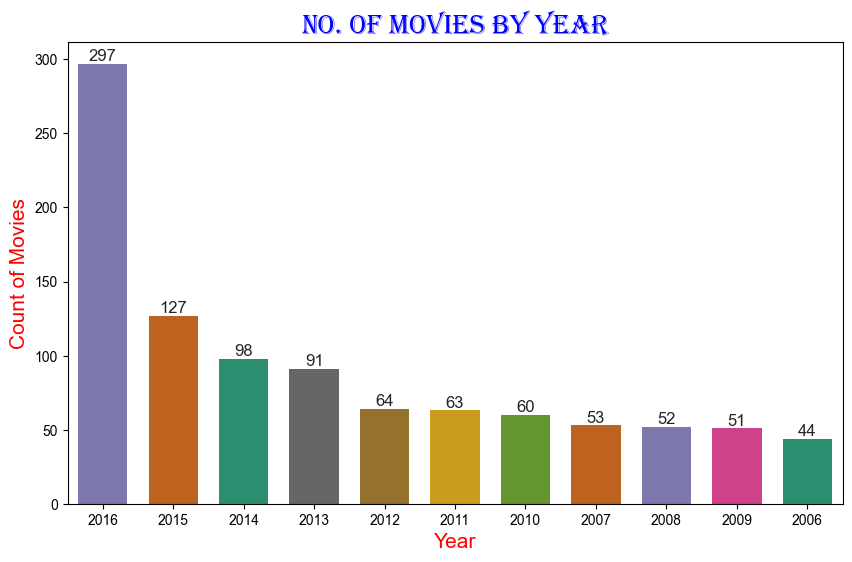

In [20]:
plt.figure(figsize=(10,6))
Movies_By_Year=sns.countplot(x='Year',data=Movies,hue='Year',legend=False,palette='Dark2',order=Movies['Year'].value_counts().index,width=0.7)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('No. of Movies By Year',fontdict=Font_Title)
plt.xlabel('Year',fontdict=Font_Label)
plt.ylabel('Count of Movies',fontdict=Font_Label)
sns.set_theme('notebook')
for i in Movies_By_Year.containers:
    Movies_By_Year.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Maximum Number of Movies were released in the Year of 2016.

Q2 Display Movies having Runtime equal to or greater than 180 Minutes ?

In [21]:
Runtime_180_Movies=Movies[Movies['Runtime (Minutes)']>=180][['Title','Runtime (Minutes)']].sort_values(by='Runtime (Minutes)',ascending=False)

In [22]:
Runtime_180_Movies

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
965,Inland Empire,180


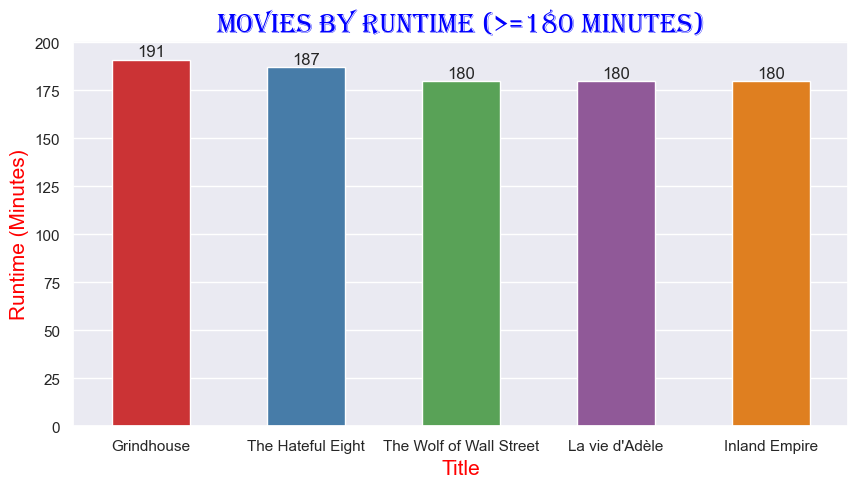

In [23]:
plt.figure(figsize=(10,5))
Movies_Runtime=sns.barplot(x='Title',y='Runtime (Minutes)',data=Runtime_180_Movies,hue='Title',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Movies By Runtime (>=180 Minutes)',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Runtime (Minutes)',fontdict=Font_Label)
for i in Movies_Runtime.containers:
    Movies_Runtime.bar_label(i)
plt.show()


## `Insight :`

From the Above Graph we can see that Grindhouse is the longest Movie with a Runtime of 191 Minutes.

Q3 Display Top 5 Movies with Highest Rating ?

In [24]:
Top_5_Movies_Rating=Movies.nlargest(5,'Rating')[['Title','Rating']]

In [25]:
Top_5_Movies_Rating

,Title,Rating
54,The Dark Knight,9.0
80,Inception,8.8
117,Dangal,8.8
36,Interstellar,8.6
96,Kimi no na wa,8.6


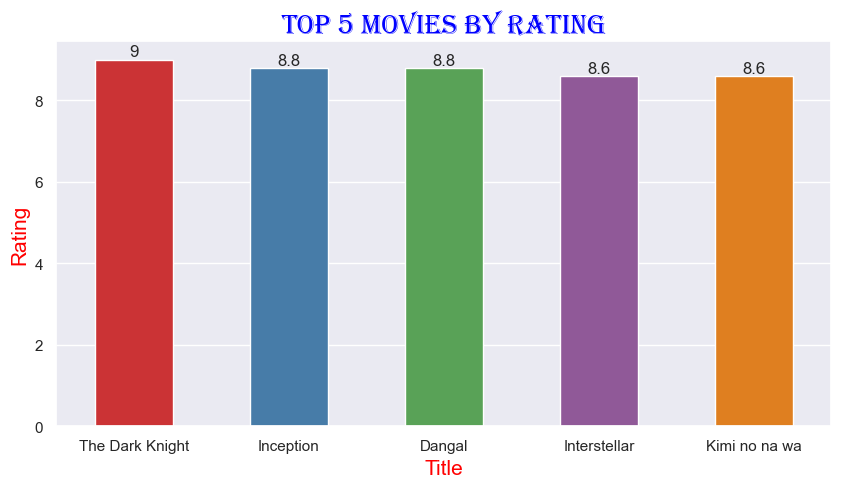

In [26]:
plt.figure(figsize=(10,5))
Movies_Rating=sns.barplot(x='Title',y='Rating',data=Top_5_Movies_Rating,hue='Title',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Movies By Rating',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Rating',fontdict=Font_Label)
for i in Movies_Rating.containers:
    Movies_Rating.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that The Dark Knight Movie gets the Highest Rating of 9.0. It means this movie is liked by most of the audience.

Q4 Display Top 5 Year which has Highest Revenue ?

In [27]:
Top_5_Year_Revenue=Movies.groupby('Year')[['Revenue (Millions)']].sum().sort_values(by='Revenue (Millions)',ascending=False).head(5)

In [28]:
Top_5_Year_Revenue

,Revenue (Millions)
Year,
2016,18672
2015,9955
2014,8283
2013,7874
2012,6884


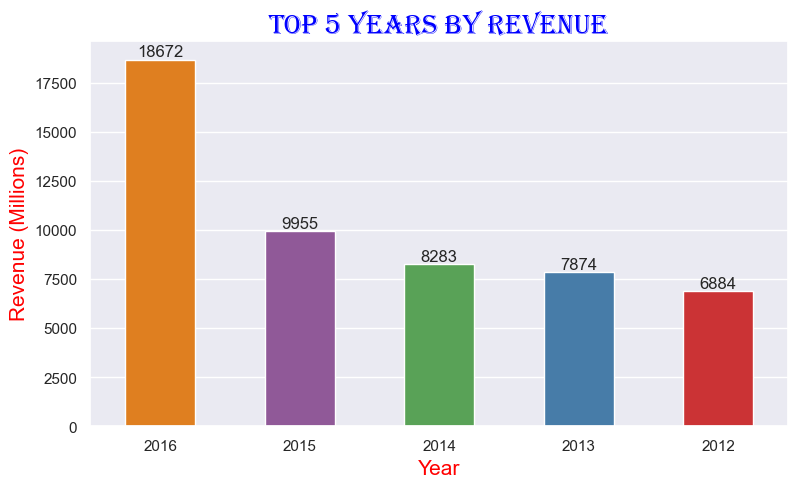

In [29]:
plt.figure(figsize=(9,5))
Year_Revenue=sns.barplot(x='Year',y='Revenue (Millions)',data=Top_5_Year_Revenue,hue='Year',legend=False,palette='Set1',width=0.5,order=[2016,2015,2014,2013,2012])
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Years By Revenue',fontdict=Font_Title)
plt.xlabel('Year',fontdict=Font_Label)
plt.ylabel('Revenue (Millions)',fontdict=Font_Label)
for i in Year_Revenue.containers:
    Year_Revenue.bar_label(i)
plt.show()


## `Insight :`

From the Above Graph we can see that 2016 is the Highest Revenue Year because maximum number of the movies were released in this year.

Q5 Display Top 5 Movies which has Highest Revenue ?

In [30]:
Top_5_Movies_Revenue=Movies.nlargest(5,'Revenue (Millions)')[['Title','Revenue (Millions)']]

In [31]:
Top_5_Movies_Revenue

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936
87,Avatar,760
85,Jurassic World,652
76,The Avengers,623
54,The Dark Knight,533


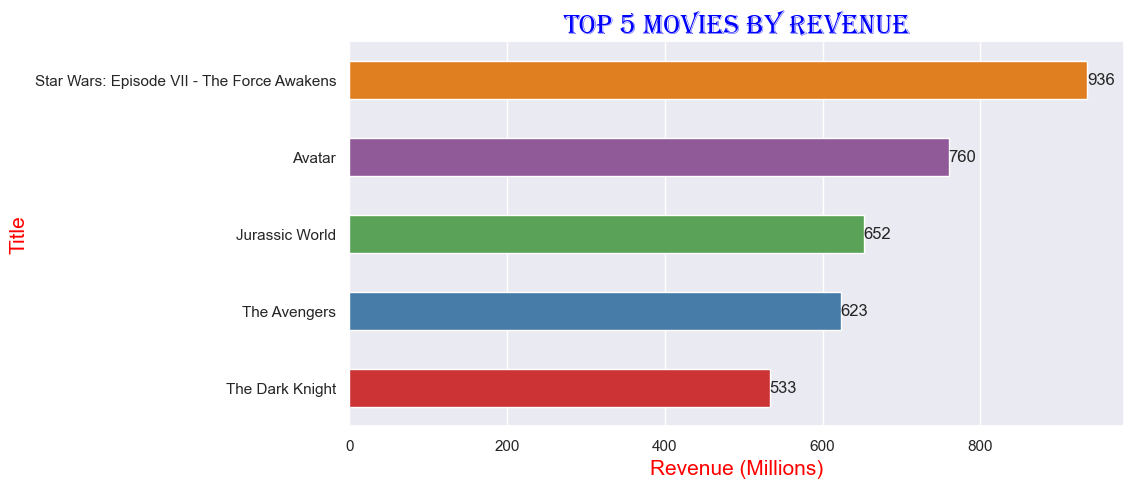

In [32]:
plt.figure(figsize=(10,5))
Movies_Revenue=sns.barplot(y='Title',x='Revenue (Millions)',data=Top_5_Movies_Revenue,hue='Revenue (Millions)',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Movies By Revenue',fontdict=Font_Title)
plt.xlabel('Revenue (Millions)',fontdict=Font_Label)
plt.ylabel('Title',fontdict=Font_Label)
for i in Movies_Revenue.containers:
    Movies_Revenue.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Star Wars: Episode VII - The Force Awakens Movie has the Highest Revenue.

Q6 Display Top 5 Directors which has directed Movies having Highest Revenue ?

In [33]:
Top_5_Director_Revenue=Movies.nlargest(5,'Revenue (Millions)')[['Director','Title','Revenue (Millions)']]

In [34]:
Top_5_Director_Revenue

,Director,Title,Revenue (Millions)
50,J.J. Abrams,Star Wars: Episode VII - The Force Awakens,936
87,James Cameron,Avatar,760
85,Colin Trevorrow,Jurassic World,652
76,Joss Whedon,The Avengers,623
54,Christopher Nolan,The Dark Knight,533


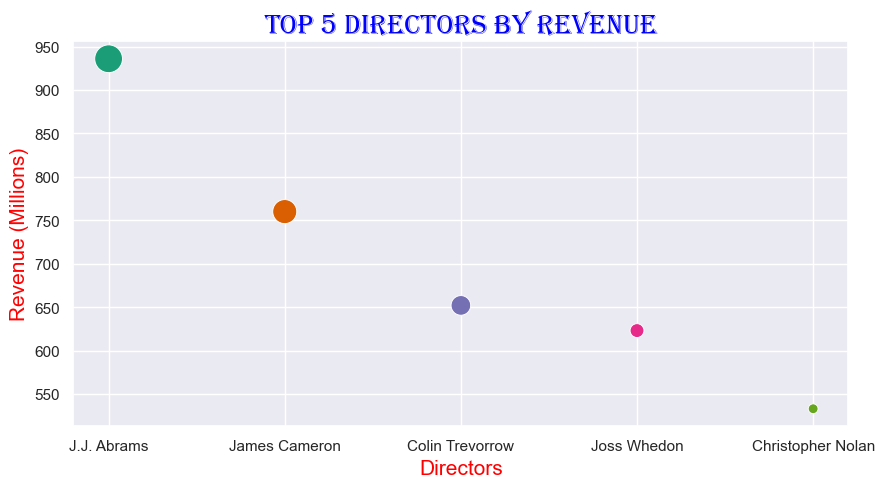

In [35]:
plt.figure(figsize=(10,5))
size=[400,300,200,100,50]
sns.scatterplot(x='Director',y='Revenue (Millions)',data=Top_5_Director_Revenue,s=size,hue='Director',legend=False,palette='Dark2')
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Directors By Revenue',fontdict=Font_Title)
plt.xlabel('Directors',fontdict=Font_Label)
plt.ylabel('Revenue (Millions)',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that J.J Abrams is the Director that directed movie having highest Revenue.

Q7 Display Top 5 Genre having Movies with Maximum Revenue ?

In [36]:
Top_5_Genre=Movies.groupby('Genre')[['Revenue (Millions)']].sum().sort_values(by='Revenue (Millions)',ascending=False).head(5)

In [37]:
Top_5_Genre

,Revenue (Millions)
Genre,
"Action,Adventure,Sci-Fi",10440
"Animation,Adventure,Comedy",5825
"Action,Adventure,Fantasy",5322
Comedy,2424
Drama,2237


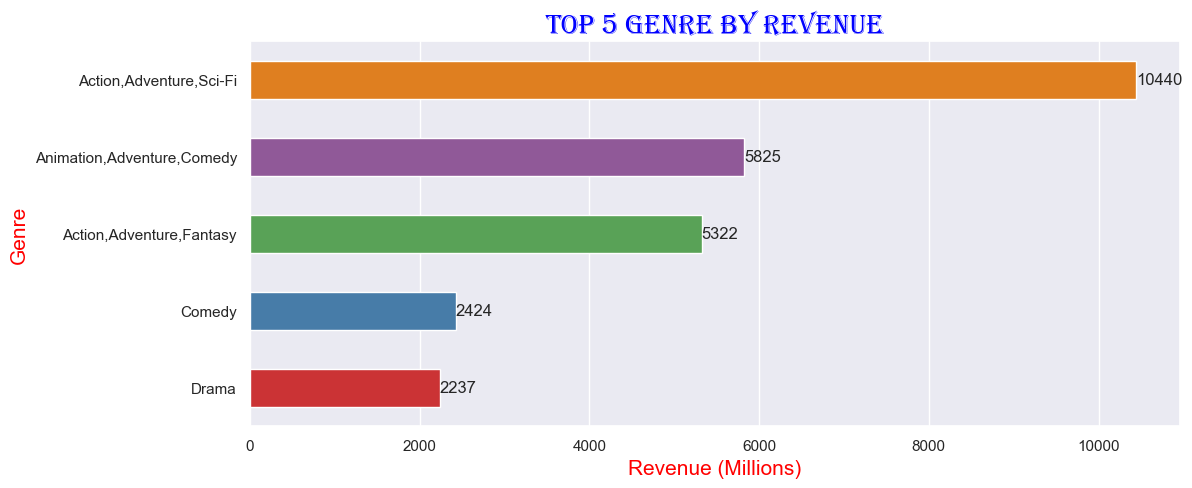

In [38]:
plt.figure(figsize=(12,5))
Genre_Revenue=sns.barplot(y='Genre',x='Revenue (Millions)',data=Top_5_Genre,hue='Revenue (Millions)',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Genre By Revenue',fontdict=Font_Title)
plt.xlabel('Revenue (Millions)',fontdict=Font_Label)
plt.ylabel('Genre',fontdict=Font_Label)
for i in Genre_Revenue.containers:
    Genre_Revenue.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Movies of 'Action,Adventure,Sci-fi' genre are the movies with Highest Revenue.

Q8 Display Top 5 Genre having Maximum Number of Movies ?

In [39]:
Movies['Genre'].value_counts().head(5)

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: count, dtype: int64

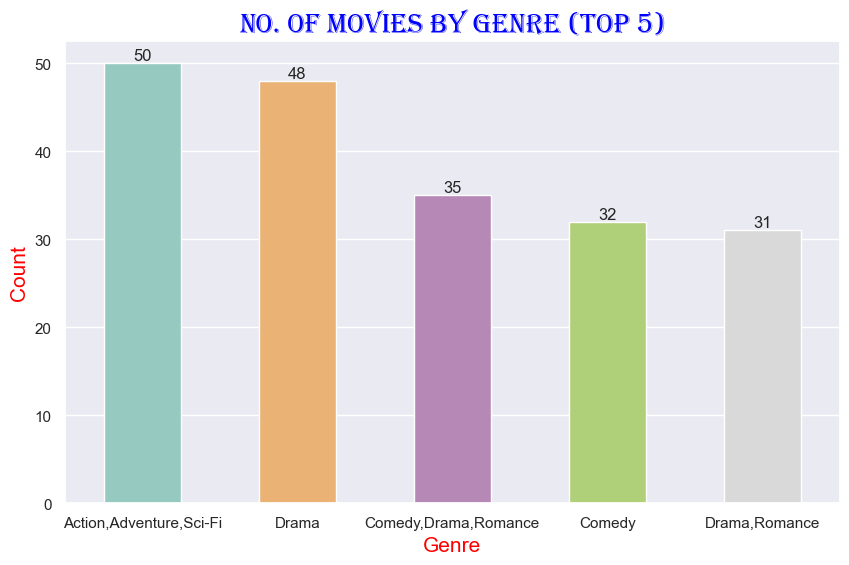

In [40]:
plt.figure(figsize=(10,6))
Movies_By_Genre=sns.countplot(x='Genre',data=Movies,hue='Genre',legend=False,palette='Set3',order=Movies['Genre'].value_counts().head(5).index,width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('No. of Movies By Genre (Top 5)',fontdict=Font_Title)
plt.xlabel('Genre',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
for i in Movies_By_Genre.containers:
    Movies_By_Genre.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Maximum Number of Movies having a Genre of 'Action,Adventure,Sci-Fi'.

Q9 Display Top 10 Directors that directed Maximum Number of Movies ?

In [41]:
Movies['Director'].value_counts().head(10)

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Name: count, dtype: int64

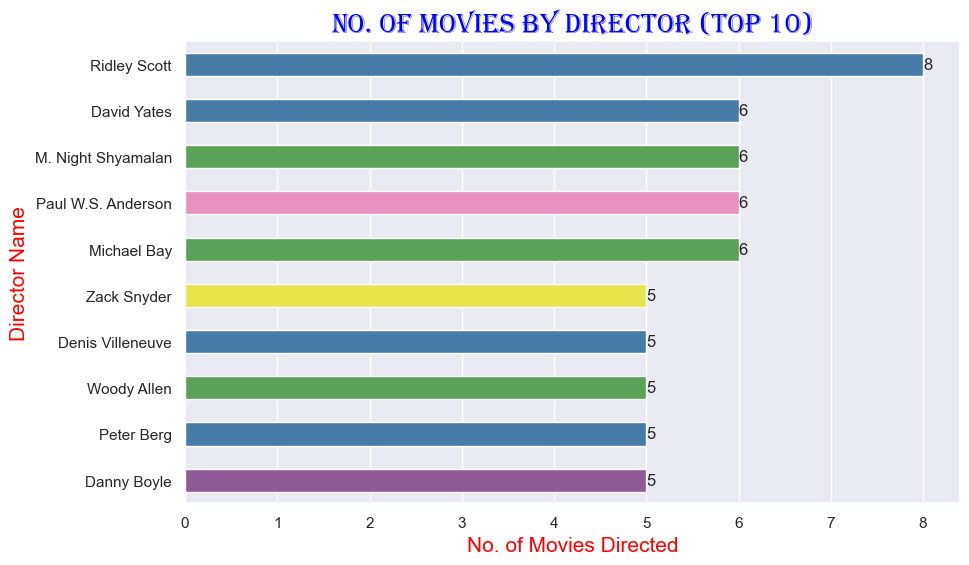

In [42]:
plt.figure(figsize=(10,6))
Movies_By_Director=sns.countplot(y='Director',data=Movies,hue='Director',legend=False,palette='Set1',order=Movies['Director'].value_counts().head(10).index,width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('No. of Movies By Director (Top 10)',fontdict=Font_Title)
plt.xlabel('No. of Movies Directed',fontdict=Font_Label)
plt.ylabel('Director Name',fontdict=Font_Label)
for i in Movies_By_Director.containers:
    Movies_By_Director.bar_label(i)
plt.show()


## `Insight :`

From the Above Graph we can see that Maximum Number of Movies are directed by Ridley Scott.

Q10 Display Top 5 Movies with Maximumn Number of Votes ?

In [43]:
Movies_By_Votes=Movies.nlargest(5,'Votes')[['Title','Votes']]

In [44]:
Movies_By_Votes

,Title,Votes
54,The Dark Knight,1791916
80,Inception,1583625
124,The Dark Knight Rises,1222645
36,Interstellar,1047747
76,The Avengers,1045588


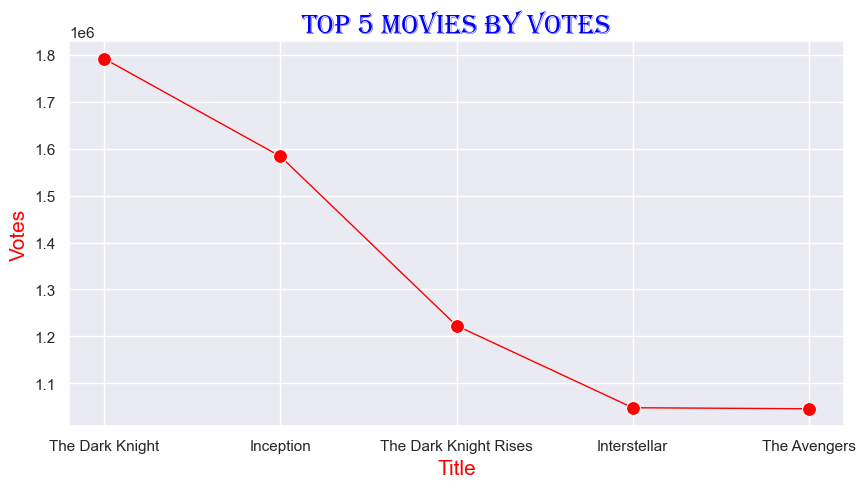

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Title',y='Votes',data=Movies_By_Votes,linewidth=1,color='Red',marker='o',markersize=10)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Movies By Votes',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Votes',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that The Dark Knight Movie has highest Number of Votes.

Q11 Display Average Rating of Movies By Year ?

In [46]:
Average_Rating_Year=Movies.groupby('Year')[['Rating']].mean().sort_values(by='Rating',ascending=False)

In [47]:
Average_Rating_Year

,Rating
Year,
2007,7.133962
2006,7.125000
2009,6.960784
2012,6.925000
2011,6.838095
2014,6.837755
2010,6.826667
2013,6.812088
2008,6.784615


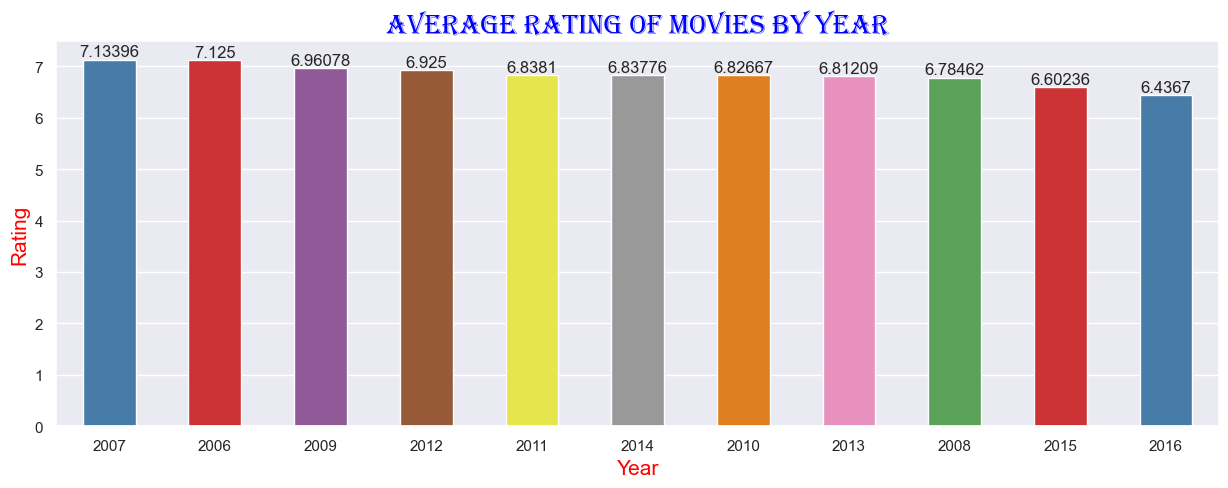

In [48]:
plt.figure(figsize=(15,5))
Movies_Average_Rating=sns.barplot(x='Year',y='Rating',data=Average_Rating_Year,hue='Year',legend=False,palette='Set1',
                                  order=[2007,2006,2009,2012,2011,2014,2010,2013,2008,2015,2016],width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Average Rating of Movies By Year',fontdict=Font_Title)
plt.xlabel('Year',fontdict=Font_Label)
plt.ylabel('Rating',fontdict=Font_Label)
for i in Movies_Average_Rating.containers:
    Movies_Average_Rating.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Movies which were released in the Year 2007 has highest average Rating as compared to other Years.

Q12 Display Top 10 Movies of the Year 2007 which has Maximum Rating ?

In [49]:
Movies_Year_2007=Movies[Movies['Year']==2007][['Title','Rating']].sort_values(by='Rating',ascending=False).head(10)

In [50]:
Movies_Year_2007

,Title,Rating
991,Taare Zameen Par,8.5
136,No Country for Old Men,8.1
427,The Bourne Ultimatum,8.1
197,Into the Wild,8.1
299,There Will Be Blood,8.1
489,Ratatouille,8.0
159,Hot Fuzz,7.9
470,American Gangster,7.8
417,Atonement,7.8
662,Gone Baby Gone,7.7


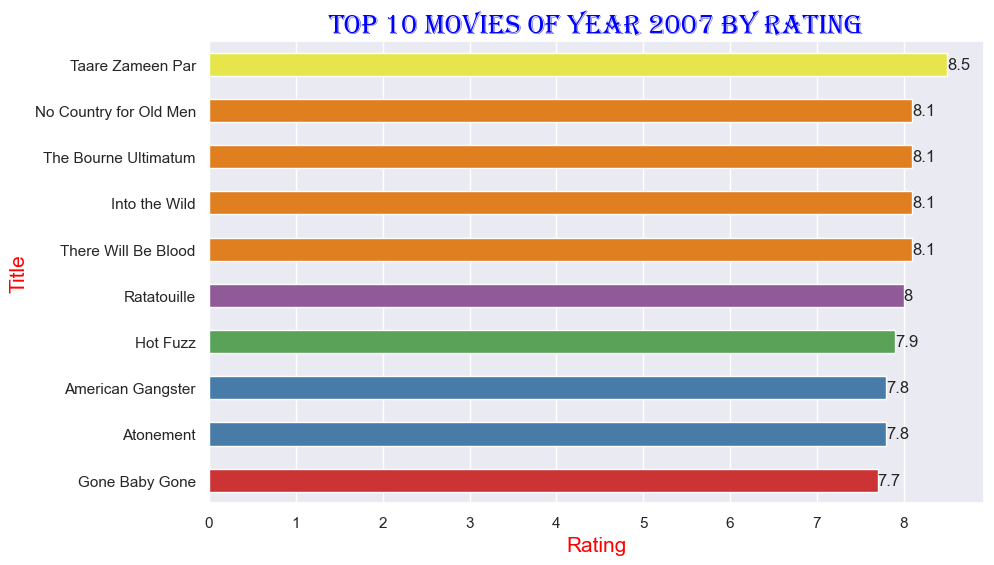

In [51]:
plt.figure(figsize=(10,6))
Rating_2007=sns.barplot(x='Rating',y='Title',data=Movies_Year_2007,hue='Rating',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 10 Movies of Year 2007 By Rating',fontdict=Font_Title)
plt.xlabel('Rating',fontdict=Font_Label)
plt.ylabel('Title',fontdict=Font_Label)
for i in Rating_2007.containers:
    Rating_2007.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that in the Year 2007 Taare Zameen Par Movie has the highest Rating of 8.5.

Q13 Display Top 5 Horror Movies with Maximum Rating ?

In [52]:
Top_5_Horror=Movies[Movies['Genre'].str.contains('Horror')][['Title','Rating']].sort_values(by='Rating',ascending=False).head(5)

In [53]:
Top_5_Horror

,Title,Rating
154,Twin Peaks: The Missing Pieces,8.1
363,Zombieland,7.7
380,What We Do in the Shadows,7.6
828,Grindhouse,7.6
290,Busanhaeng,7.5


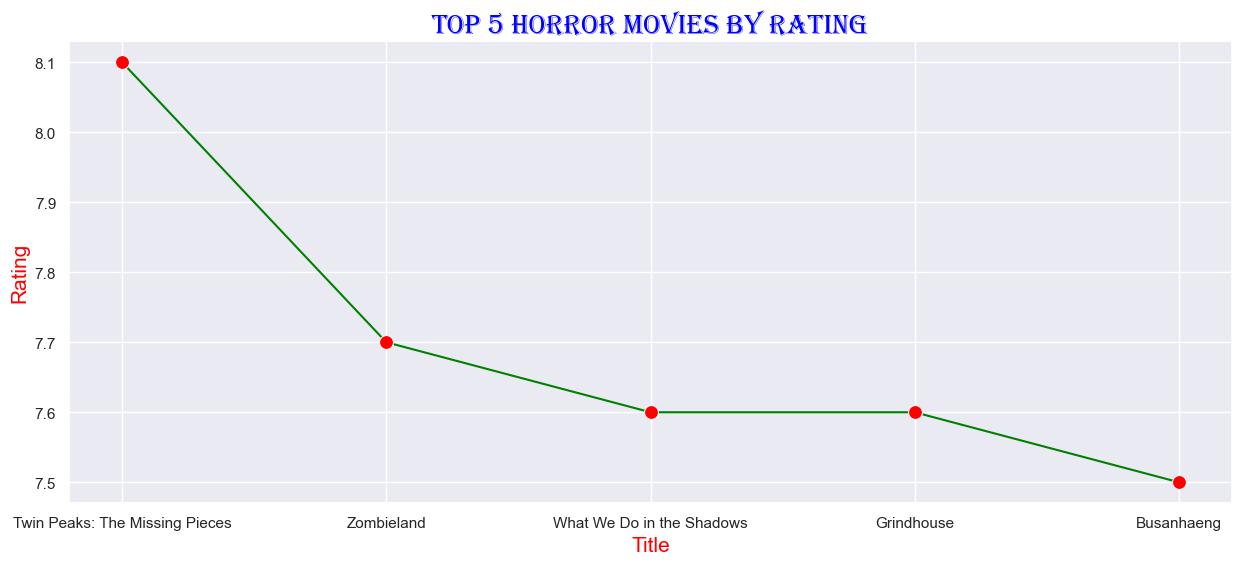

In [54]:
plt.figure(figsize=(15,6))
Horror_Rating=sns.lineplot(x='Title',y='Rating',data=Top_5_Horror,color='Green',marker='o',markersize=10,markerfacecolor='Red')
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Horror Movies By Rating',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Rating',fontdict=Font_Label)
for i in Horror_Rating.containers:
    Horror_Rating.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Twin Peaks: The Missing Pieces is the only Horror Movie which has Maximum Rating of 8.1 as compared to other Horror Movies.

Q14 Display Top 5 Smallest Movies By Runtime ?

In [55]:
Top_5_Smallest_Runtime=Movies.nsmallest(5,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].sort_values(by='Runtime (Minutes)',ascending=True)

In [56]:
Top_5_Smallest_Runtime

,Title,Runtime (Minutes)
793,Ma vie de Courgette,66
42,Don't Fuck in the Woods,73
819,Wolves at the Door,73
711,La tortue rouge,80
949,Kicks,80


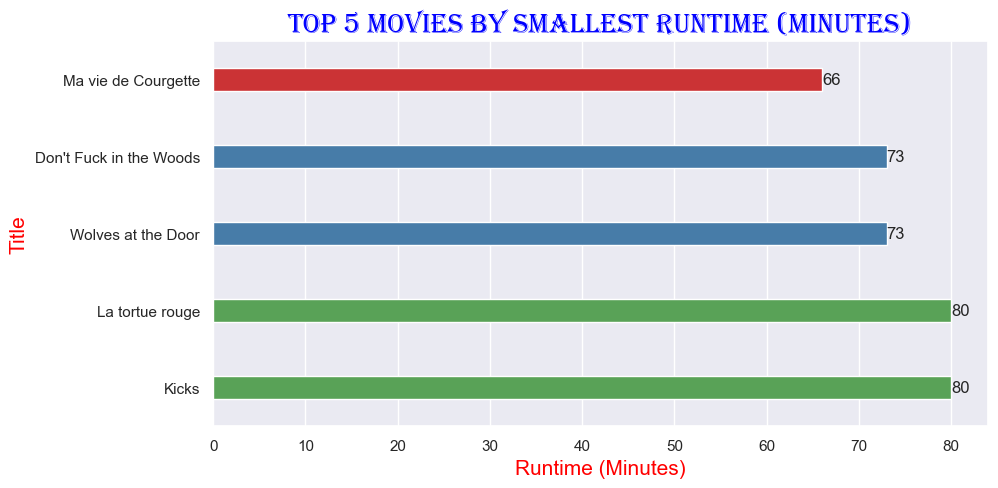

In [57]:
plt.figure(figsize=(10,5))
Smallest_Runtime=sns.barplot(y='Title',x='Runtime (Minutes)',data=Top_5_Smallest_Runtime,hue='Runtime (Minutes)',legend=False,palette='Set1',width=0.3)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Movies By Smallest Runtime (Minutes)',fontdict=Font_Title)
plt.xlabel('Runtime (Minutes)',fontdict=Font_Label)
plt.ylabel('Title',fontdict=Font_Label)
for i in Smallest_Runtime.containers:
    Smallest_Runtime.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that the Movie with Title 'Ma vie de Courgette' has a smallest runtime of 66 minutes only.

Q15 Display only those Movies which are directed by 'Ridley Scott' along with their Revenue ?

In [58]:
Ridley_Scott=Movies[Movies['Director']=='Ridley Scott'][['Title','Revenue (Millions)']].sort_values(by='Revenue (Millions)',ascending=False)

In [59]:
Ridley_Scott

,Title,Revenue (Millions)
102,The Martian,228
470,American Gangster,130
1,Prometheus,126
387,Robin Hood,105
516,Exodus: Gods and Kings,65
737,Body of Lies,39
521,The Counselor,16
530,A Good Year,7


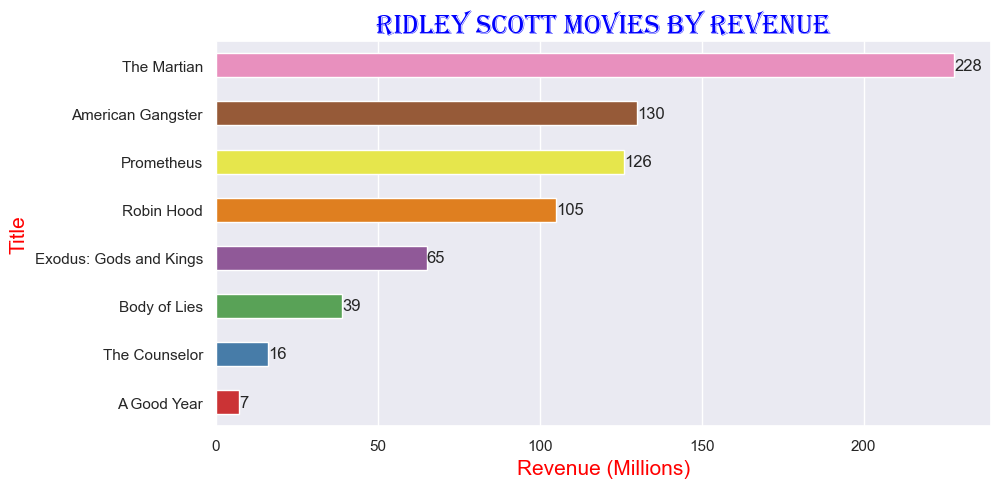

In [60]:
plt.figure(figsize=(10,5))
Ridley_Revenue=sns.barplot(y='Title',x='Revenue (Millions)',data=Ridley_Scott,hue='Revenue (Millions)',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Ridley Scott Movies By Revenue',fontdict=Font_Title)
plt.xlabel('Revenue (Millions)',fontdict=Font_Label)
plt.ylabel('Title',fontdict=Font_Label)
for i in Ridley_Revenue.containers:
    Ridley_Revenue.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Ridley Scott has Directed 8 Movies and 'The Martian' is the movie with the Highest Revenue of 228 Millions.

Q16 Display Top 5 Horror Movies with Maximum Revenue ?

In [61]:
Top_5_Horror_Revenue=Movies[Movies['Genre'].str.contains('Horror')][['Title','Revenue (Millions)']].sort_values(by='Revenue (Millions)',ascending=False).head(5)

In [62]:
Top_5_Horror_Revenue

,Title,Revenue (Millions)
495,I Am Legend,256
432,World War Z,202
2,Split,138
254,The Conjuring,137
178,The Conjuring 2,102


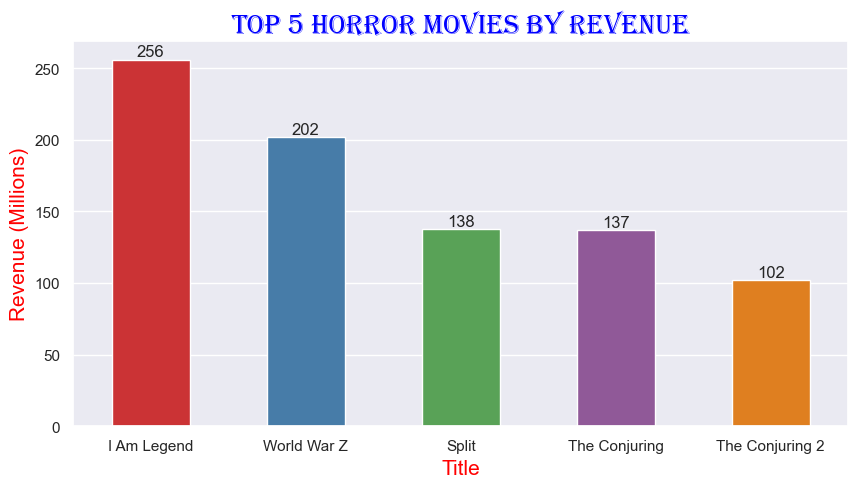

In [63]:
plt.figure(figsize=(10,5))
Horror_Revenue=sns.barplot(x='Title',y='Revenue (Millions)',data=Top_5_Horror_Revenue,hue='Title',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Horror Movies By Revenue',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Revenue (Millions)',fontdict=Font_Label)
for i in Horror_Revenue.containers:
    Horror_Revenue.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that 'I am Legend' is the only Horror Movie which has the highest Revenue of 256 Millions as compared to other Horror Movies.

Q17 Display Top 5 Pure Horror Movies (Having Horror Genre Only) along with their Revenue ?

In [64]:
Pure_Horror_Revenue=Movies[Movies['Genre']=='Horror'][['Title','Revenue (Millions)']].sort_values(by='Revenue (Millions)',ascending=False).head(5)

In [65]:
Pure_Horror_Revenue

,Title,Revenue (Millions)
42,Don't Fuck in the Woods,82
269,Satanic,82
401,The Black Room,82
988,Martyrs,82
258,Lights Out,67


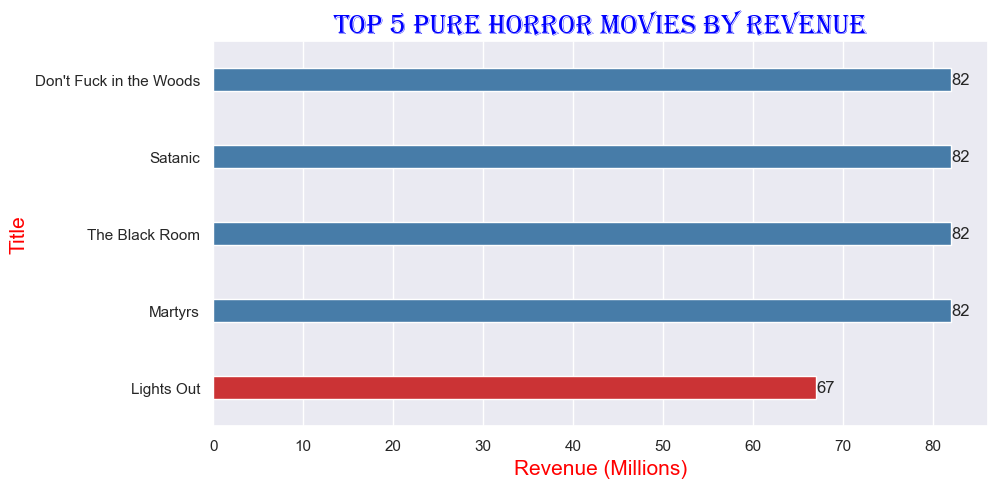

In [66]:
plt.figure(figsize=(10,5))
Pure_Horror=sns.barplot(y='Title',x='Revenue (Millions)',data=Pure_Horror_Revenue,hue='Revenue (Millions)',legend=False,palette='Set1',width=0.3)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Pure Horror Movies By Revenue',fontdict=Font_Title)
plt.xlabel('Revenue (Millions)',fontdict=Font_Label)
plt.ylabel('Title',fontdict=Font_Label)
for i in Pure_Horror.containers:
    Pure_Horror.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that there are 4 Pure Horror Movies having Horror Genre Only with Maximum Revenue of 82 Millions.

Q18 Display Top 5 Pure Horror Movies (Having Horror Genre Only) along with their Rating ?

In [67]:
Pure_Horror_Rating=Movies[Movies['Genre']=='Horror'][['Title','Rating']].sort_values(by='Rating',ascending=False).head(5)

In [68]:
Pure_Horror_Rating

,Title,Rating
675,The Mist,7.2
988,Martyrs,7.1
302,The Cabin in the Woods,7.0
258,Lights Out,6.4
858,The Hills Have Eyes,6.4


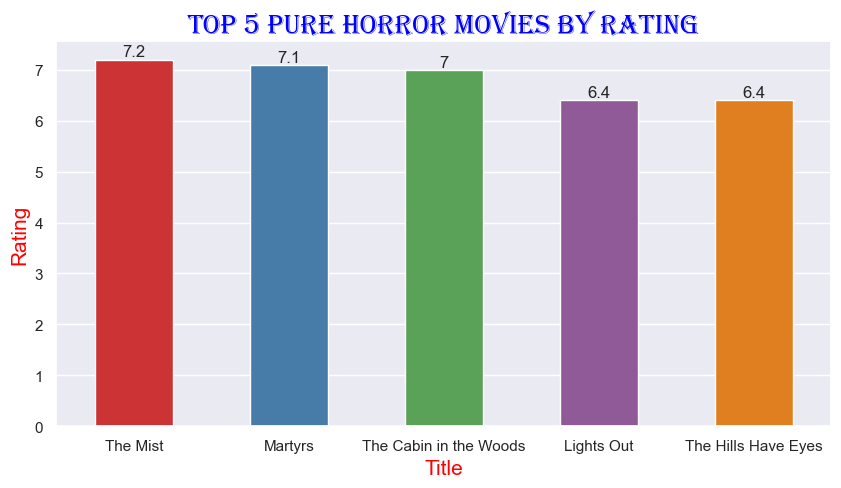

In [69]:
plt.figure(figsize=(10,5))
Pure_Horror_Rating_Movie=sns.barplot(x='Title',y='Rating',data=Pure_Horror_Rating,hue='Title',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 5 Pure Horror Movies By Rating',fontdict=Font_Title)
plt.xlabel('Title',fontdict=Font_Label)
plt.ylabel('Rating',fontdict=Font_Label)
for i in Pure_Horror_Rating_Movie.containers:
    Pure_Horror_Rating_Movie.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that 'The Mist' is the only Pure Horror Movie which has the Highest Rating of 7.2 as compared to other Pure Horror Movies.

## `Summary :`

## `Longest Runtime Movie : Grindhouse`

## `Smallest Runtime Movie : Ma vie de Courgette`

## `Year with Maximum No. of Movies : 2016`

## `Movie with Highest Revenue : Star Wars: Episode VII - The Force Awakens`

## `Movie with Highest Rating : The Dark Knight`

## `Movie with Highest Votes : The Dark Knight`

## `Year with Highest Revenue : 2016`

## `Director with Highest Revenue : J.J. Abrams`

## `Genre with Maximum No. of Movies : Action,Adventure,Sci-Fi`

## `Director with Maximum No. of Movies : Ridley Scott`

## `Genre with Highest Revenue : Action,Adventure,Sci-Fi`

## `Horror Movie with Highest Rating : 	Twin Peaks: The Missing Pieces`

## `Horror Movie with Highest Revenue : I am Legend`

## `Pure Horror Movie with Highest Rating : The Mist`

## `No. of Pure Horror Movie with Highest Revenue : 4`